In [2]:
import pandas as pd
import re
from collections import Counter
import spacy
from langdetect import detect

import requests
import certifi



In [5]:
nlp_en = spacy.load("en_core_web_sm")
nlp_fr = spacy.load("fr_core_news_sm")

In [7]:
df = pd.read_excel(r'C:\Users\cesar\Documents\DocsAplicacionesdeTrabajo\Portafolio_Proyectos\Marketing associate keyword project\LinkedInJobData_MarketingAutomation.xlsx')


In [8]:


def detect_language(text):
    try:
        return detect(text)
    except:
        return None
    
def preprocess_text(text, detected_language):
    if not isinstance(text, str):
        return ''
    
    text = text.lower()

    combined_stopwords = nlp_en.Defaults.stop_words.union(nlp_fr.Defaults.stop_words)

    # Select the correct spaCy model based on detected language
    if detected_language == 'en':
        doc = nlp_en(text)
    elif detected_language == 'fr':
        doc = nlp_fr(text)
    else:
        # Fallback for other languages
        return ' '.join([word for word in text.split() if word not in combined_stopwords and len(word) > 1])
    
    # Remove stopwords and punctuation
    tokens = [token.text for token in doc if token.text not in combined_stopwords and not token.is_punct and len(token.text) > 1]
    return ' '.join(tokens)


In [9]:
# Detect language and preprocess text
df['Detected_Language'] = df['description'].apply(detect_language)
df['Processed_Description'] = df.apply(lambda x: preprocess_text(x['description'], x['Detected_Language']), axis=1)

# Filter English and French posts and combine descriptions
english_descriptions = ' '.join(df[df['Detected_Language'] == 'en']['Processed_Description'])
french_descriptions = ' '.join(df[df['Detected_Language'] == 'fr']['Processed_Description'])

In [10]:
# Tokenize and count keywords
english_tokens = re.findall(r'\b\w+\b', english_descriptions)
english_keyword_counts = Counter(english_tokens)
french_tokens = re.findall(r'\b\w+\b', french_descriptions)
french_keyword_counts = Counter(french_tokens)

# Get the most common keywords
top_english_keywords = english_keyword_counts.most_common(10)
top_french_keywords = french_keyword_counts.most_common(10)

english_keyword_counts, french_keyword_counts

(Counter({'marketing': 81,
          'experience': 53,
          'canonical': 51,
          'data': 44,
          'team': 42,
          'skills': 36,
          'work': 35,
          'technology': 28,
          'business': 28,
          'content': 28,
          'company': 26,
          'campaigns': 24,
          'environment': 24,
          'salesforce': 22,
          'sales': 21,
          'benefits': 20,
          'platform': 20,
          'new': 19,
          'world': 19,
          'strong': 19,
          'travel': 19,
          'teams': 19,
          'projects': 18,
          'knowledge': 18,
          'working': 18,
          'annual': 18,
          'global': 18,
          'equans': 18,
          'opportunity': 17,
          'including': 17,
          'use': 17,
          'location': 17,
          'market': 16,
          'automation': 16,
          'social': 16,
          'media': 16,
          'digital': 16,
          'open': 16,
          'source': 16,
          'learning': 16,
 

In [11]:
print("Top English Keywords:")
for keyword, count in top_english_keywords:
    print(f'{keyword}: {count}')

print("\nTop French Keywords:")
for keyword, count in top_french_keywords:
    print(f'{keyword}: {count}')

Top English Keywords:
marketing: 81
experience: 53
canonical: 51
data: 44
team: 42
skills: 36
work: 35
technology: 28
business: 28
content: 28

Top French Keywords:
marketing: 117
équipe: 68
communication: 45
expérience: 41
e: 38
entreprise: 37
poste: 37
clients: 36
mise: 35
suivi: 34


In [14]:
import pandas as pd
import re
from collections import Counter
import spacy
from langdetect import detect

import requests
import certifi

nlp_en = spacy.load("en_core_web_sm")
nlp_fr = spacy.load("fr_core_news_sm")

df = pd.read_excel(
    r'C:\Users\cesar\Documents\DocsAplicacionesdeTrabajo\Portafolio_Proyectos\Marketing associate keyword project\LinkedInJobData_MarketingAutomation.xlsx'
                  )

# Load the Excel file with important words
important_words_df = pd.read_excel('important_words_filtered.xlsx')

def detect_language(text):
    try:
        return detect(text)
    except:
        return None
    
def preprocess_text(text, detected_language):
    if not isinstance(text, str):
        return ''
    
    text = text.lower()

    combined_stopwords = nlp_en.Defaults.stop_words.union(nlp_fr.Defaults.stop_words)

    # Select the correct spaCy model based on detected language
    if detected_language == 'en':
        doc = nlp_en(text)
    elif detected_language == 'fr':
        doc = nlp_fr(text)
    else:
        # Fallback for other languages
        return ' '.join([word for word in text.split() if word not in combined_stopwords and len(word) > 1])
    
    # Remove stopwords and punctuation
    tokens = [token.text for token in doc if token.text not in combined_stopwords and not token.is_punct and len(token.text) > 1]
    return ' '.join(tokens)

# Detect language and preprocess text
df['Detected_Language'] = df['description'].apply(detect_language)
df['Processed_Description'] = df.apply(lambda x: preprocess_text(x['description'], x['Detected_Language']), axis=1)

# Filter English and French posts and combine descriptions
english_descriptions = ' '.join(df[df['Detected_Language'] == 'en']['Processed_Description'])
french_descriptions = ' '.join(df[df['Detected_Language'] == 'fr']['Processed_Description'])

# Tokenize and count keywords
english_tokens = re.findall(r'\b\w+\b', english_descriptions)
english_keyword_counts = Counter(english_tokens)
french_tokens = re.findall(r'\b\w+\b', french_descriptions)
french_keyword_counts = Counter(french_tokens)

# Get the most common keywords
top_english_keywords = english_keyword_counts.most_common(10)
top_french_keywords = french_keyword_counts.most_common(10)

# Load the important words from the Excel file
important_words = []
for column in important_words_df.columns:
    important_words.extend(important_words_df[column].dropna().unique().tolist())

# Function to check if a word is in the list of important words
def is_word_important(word):
    return word in important_words

# Extracted keywords from descriptions (already present in 'Processed_Description' column)
extracted_keywords = english_tokens + french_tokens

# Filter and add keywords to the respective dictionaries based on importance
for keyword in extracted_keywords:
    detected_language = detect_language(keyword)
    if is_word_important(keyword):
        if detected_language == 'en':
            top_english_keywords.append((keyword, 1))  # Assuming a count of 1 for now
        elif detected_language == 'fr':
            top_french_keywords.append((keyword, 1))  # Assuming a count of 1 for now

# Sort the dictionaries based on counts (you can adjust the count values as needed)
top_english_keywords.sort(key=lambda x: x[1], reverse=True)
top_french_keywords.sort(key=lambda x: x[1], reverse=True)

# Get the top 10 keywords
top_english_keywords = top_english_keywords[:10]
top_french_keywords = top_french_keywords[:10]

# Print the results
print("Top English Keywords:", top_english_keywords)
print("Top French Keywords:", top_french_keywords)


Top English Keywords: [('marketing', 81), ('experience', 53), ('canonical', 51), ('data', 44), ('team', 42), ('skills', 36), ('work', 35), ('technology', 28), ('business', 28), ('content', 28)]
Top French Keywords: [('marketing', 117), ('équipe', 68), ('communication', 45), ('expérience', 41), ('e', 38), ('entreprise', 37), ('poste', 37), ('clients', 36), ('mise', 35), ('suivi', 34)]


In [20]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming 'top_english_keywords' and 'top_french_keywords' are lists of tuples like [('word1', count1), ('word2', count2), ...]
english_freq_dict = dict(english_keyword_counts)
french_freq_dict = dict(french_keyword_counts)

# Create a word cloud for English words
wordcloud_en = WordCloud(width=800, height=400, background_color='white', color_func=lambda *args, **kwargs: 'blue').generate_from_frequencies(english_freq_dict)

# Create a word cloud for French words
wordcloud_fr = WordCloud(width=800, height=400, background_color='white', color_func=lambda *args, **kwargs: 'red').generate_from_frequencies(french_freq_dict)

# Display the word clouds
plt.figure(figsize=(30, 15))

<Figure size 3000x1500 with 0 Axes>

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, 'Top English Keywords')

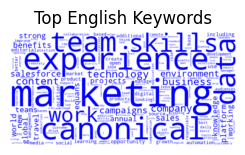

In [21]:
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_en, interpolation='bilinear')
plt.axis('off')
plt.title('Top English Keywords')

Text(0.5, 1.0, 'Top French Keywords')

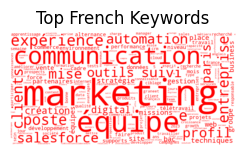

In [22]:
plt.subplot(1, 2, 2)
plt.imshow(wordcloud_fr, interpolation='bilinear')
plt.axis('off')
plt.title('Top French Keywords')